## 24 Seabornで簡単にお洒落な図を描画する【ヒストグラム，散布図編】

[データサイエンスのためのPython入門24〜Seabornで簡単にお洒落な図を描画する【ヒストグラム，散布図編】〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/seaborn_distribution/)

### ヒストグラム: displot()とhistplot()

In [1]:
import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")

`displot()`はfigure-levelで多機能

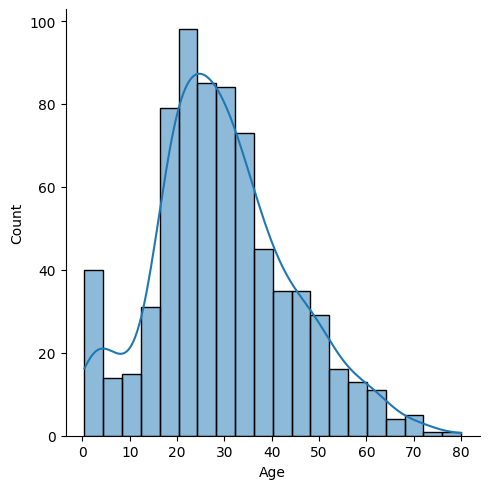

In [3]:
sns.displot(df["Age"], kde=True)

一方`histplot()`はaxes-levelでヒストグラムに特化

<Axes: xlabel='Age', ylabel='Count'>

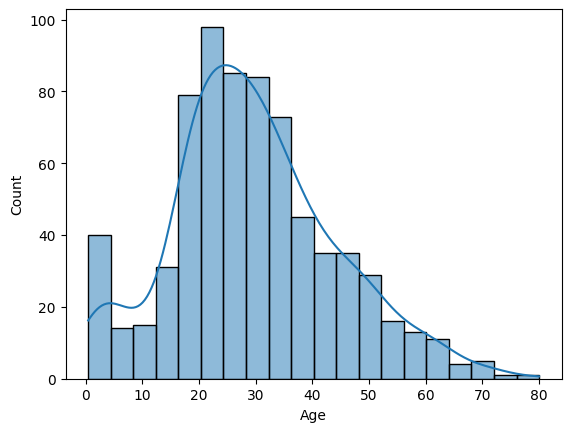

In [4]:
sns.histplot(df["Age"], kde=True)

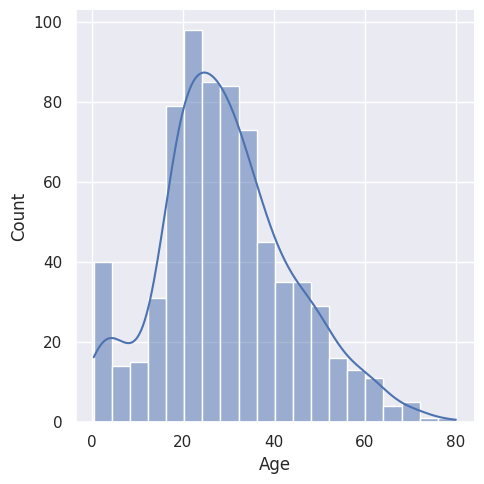

In [5]:
sns.set()
sns.displot(df["Age"], kde=True)

### 2変数の分布: jointplot()

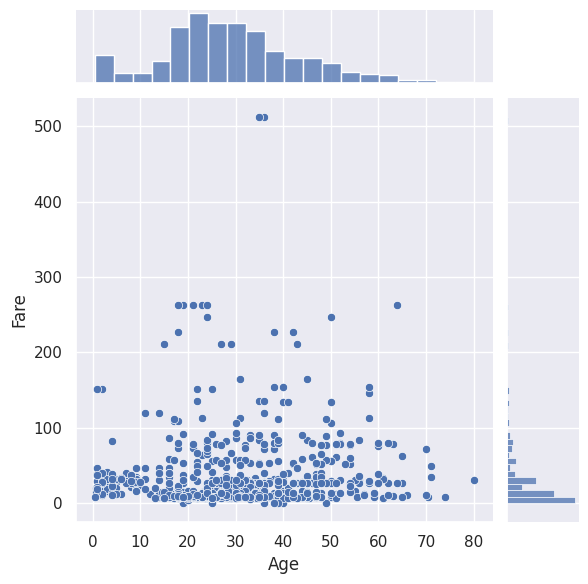

In [6]:
sns.jointplot(data=df, x="Age", y="Fare")

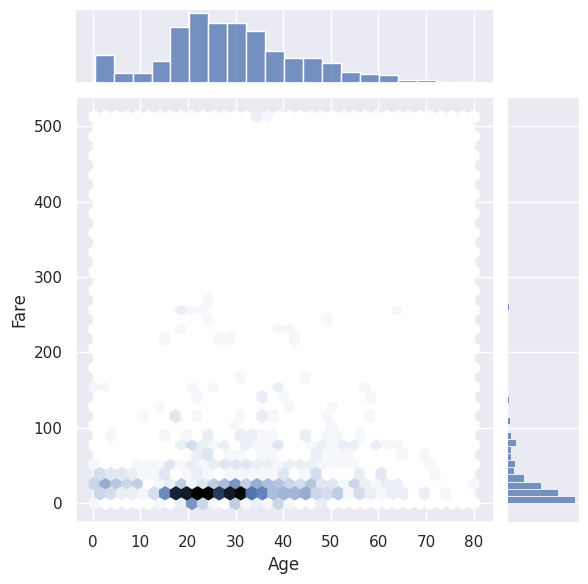

In [7]:
sns.jointplot(data=df, x="Age", y="Fare", kind="hex")

### 全変数組の散布図: pairplot()

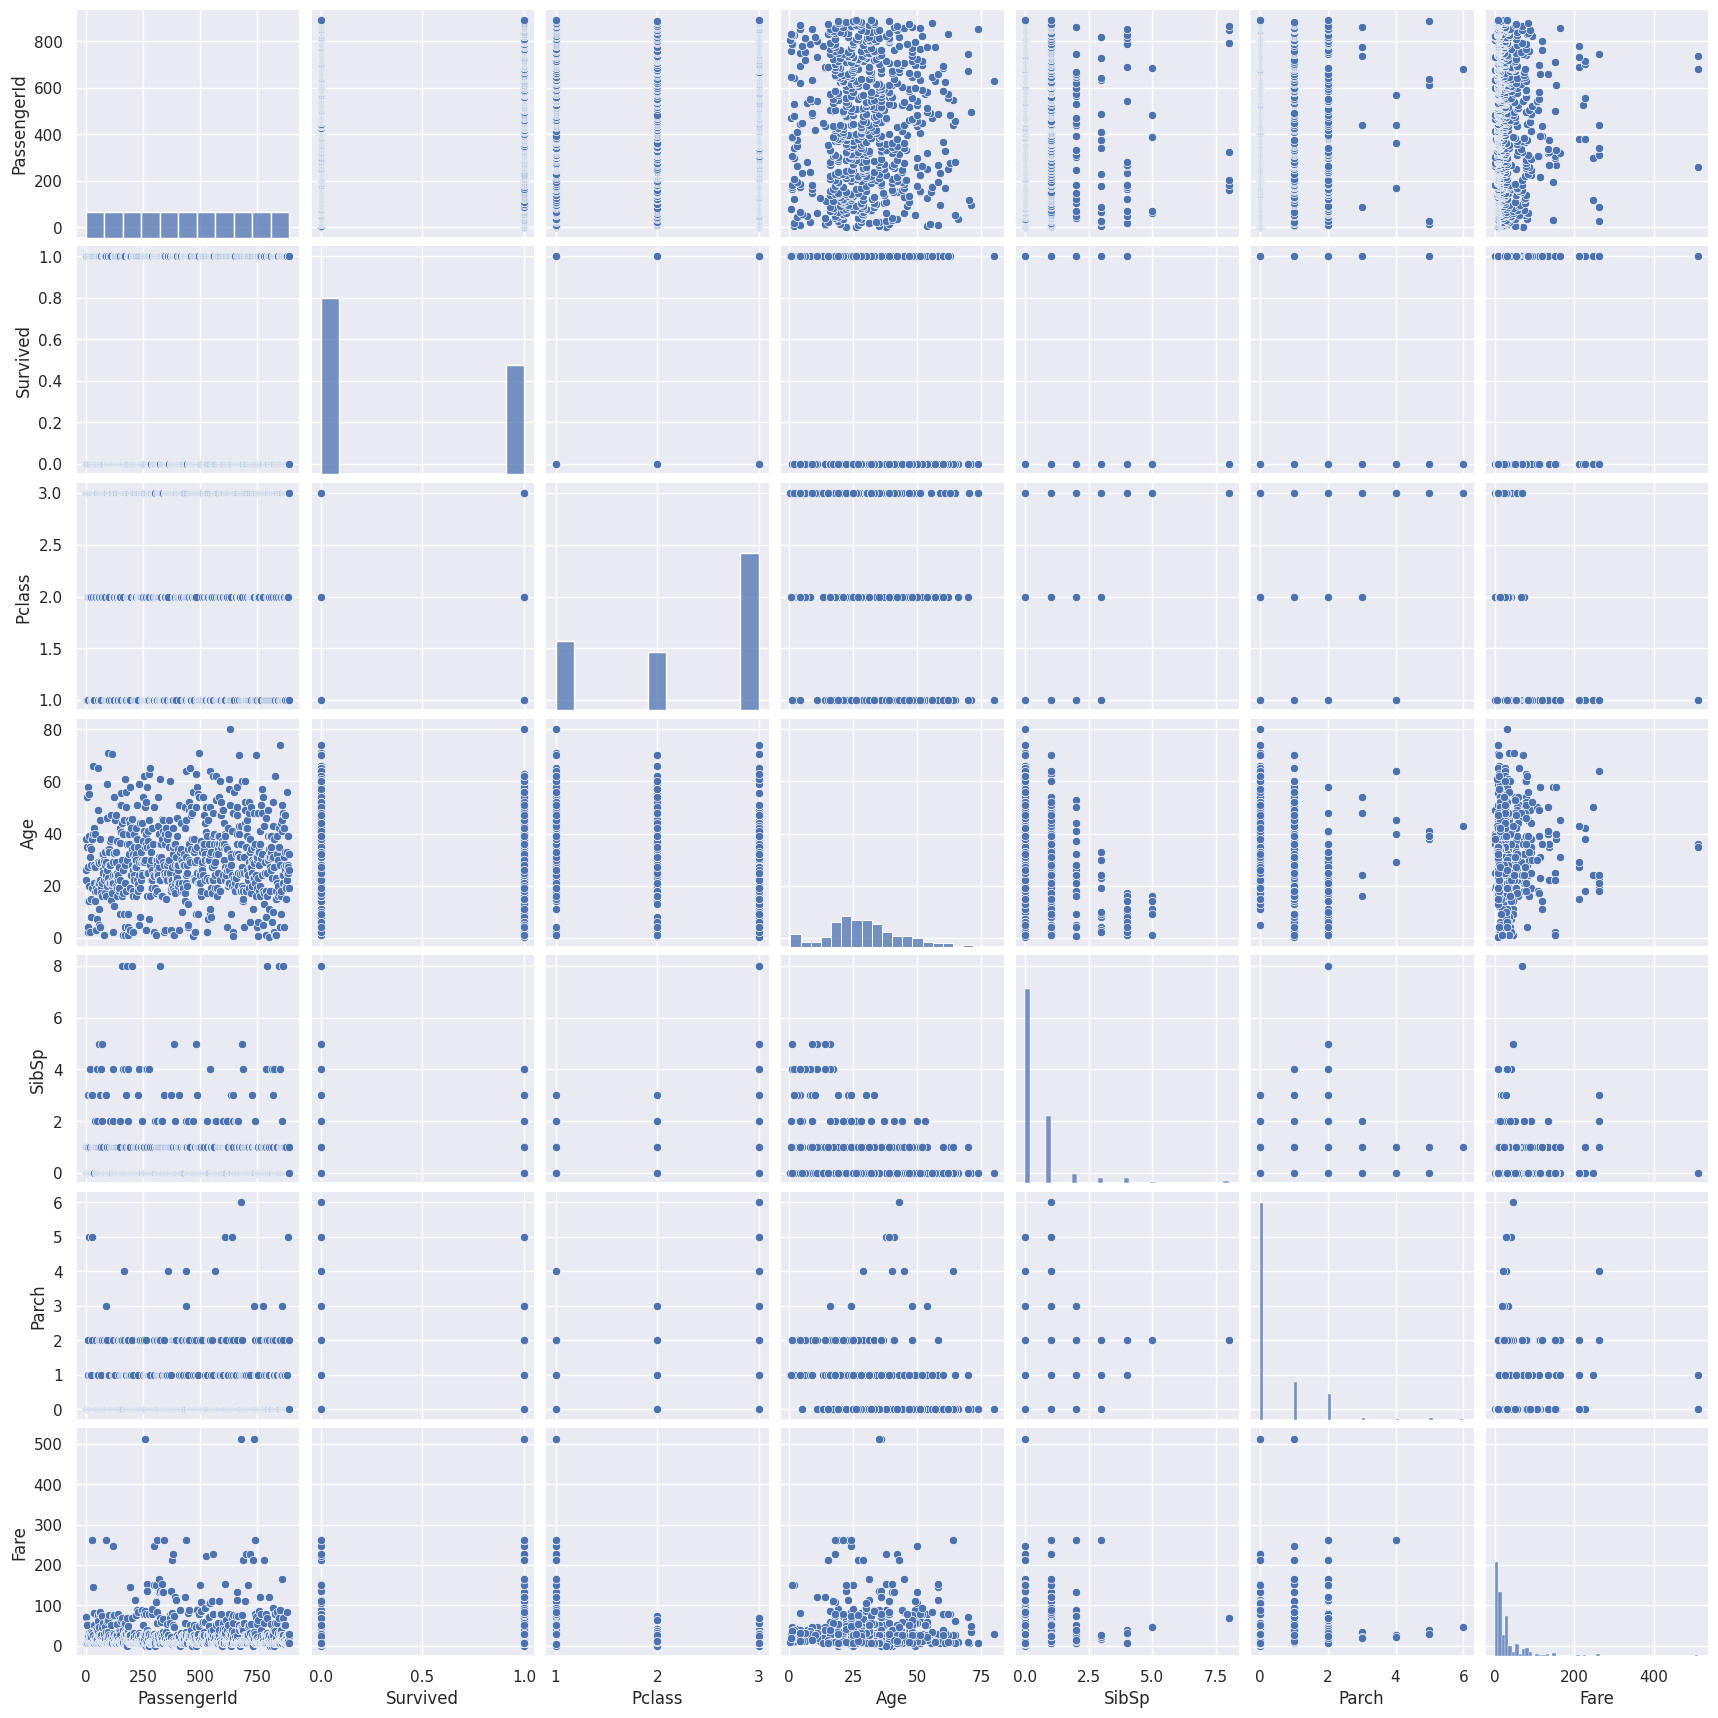

In [8]:
sns.pairplot(df)

`hue`で`Survived`毎に色分けする

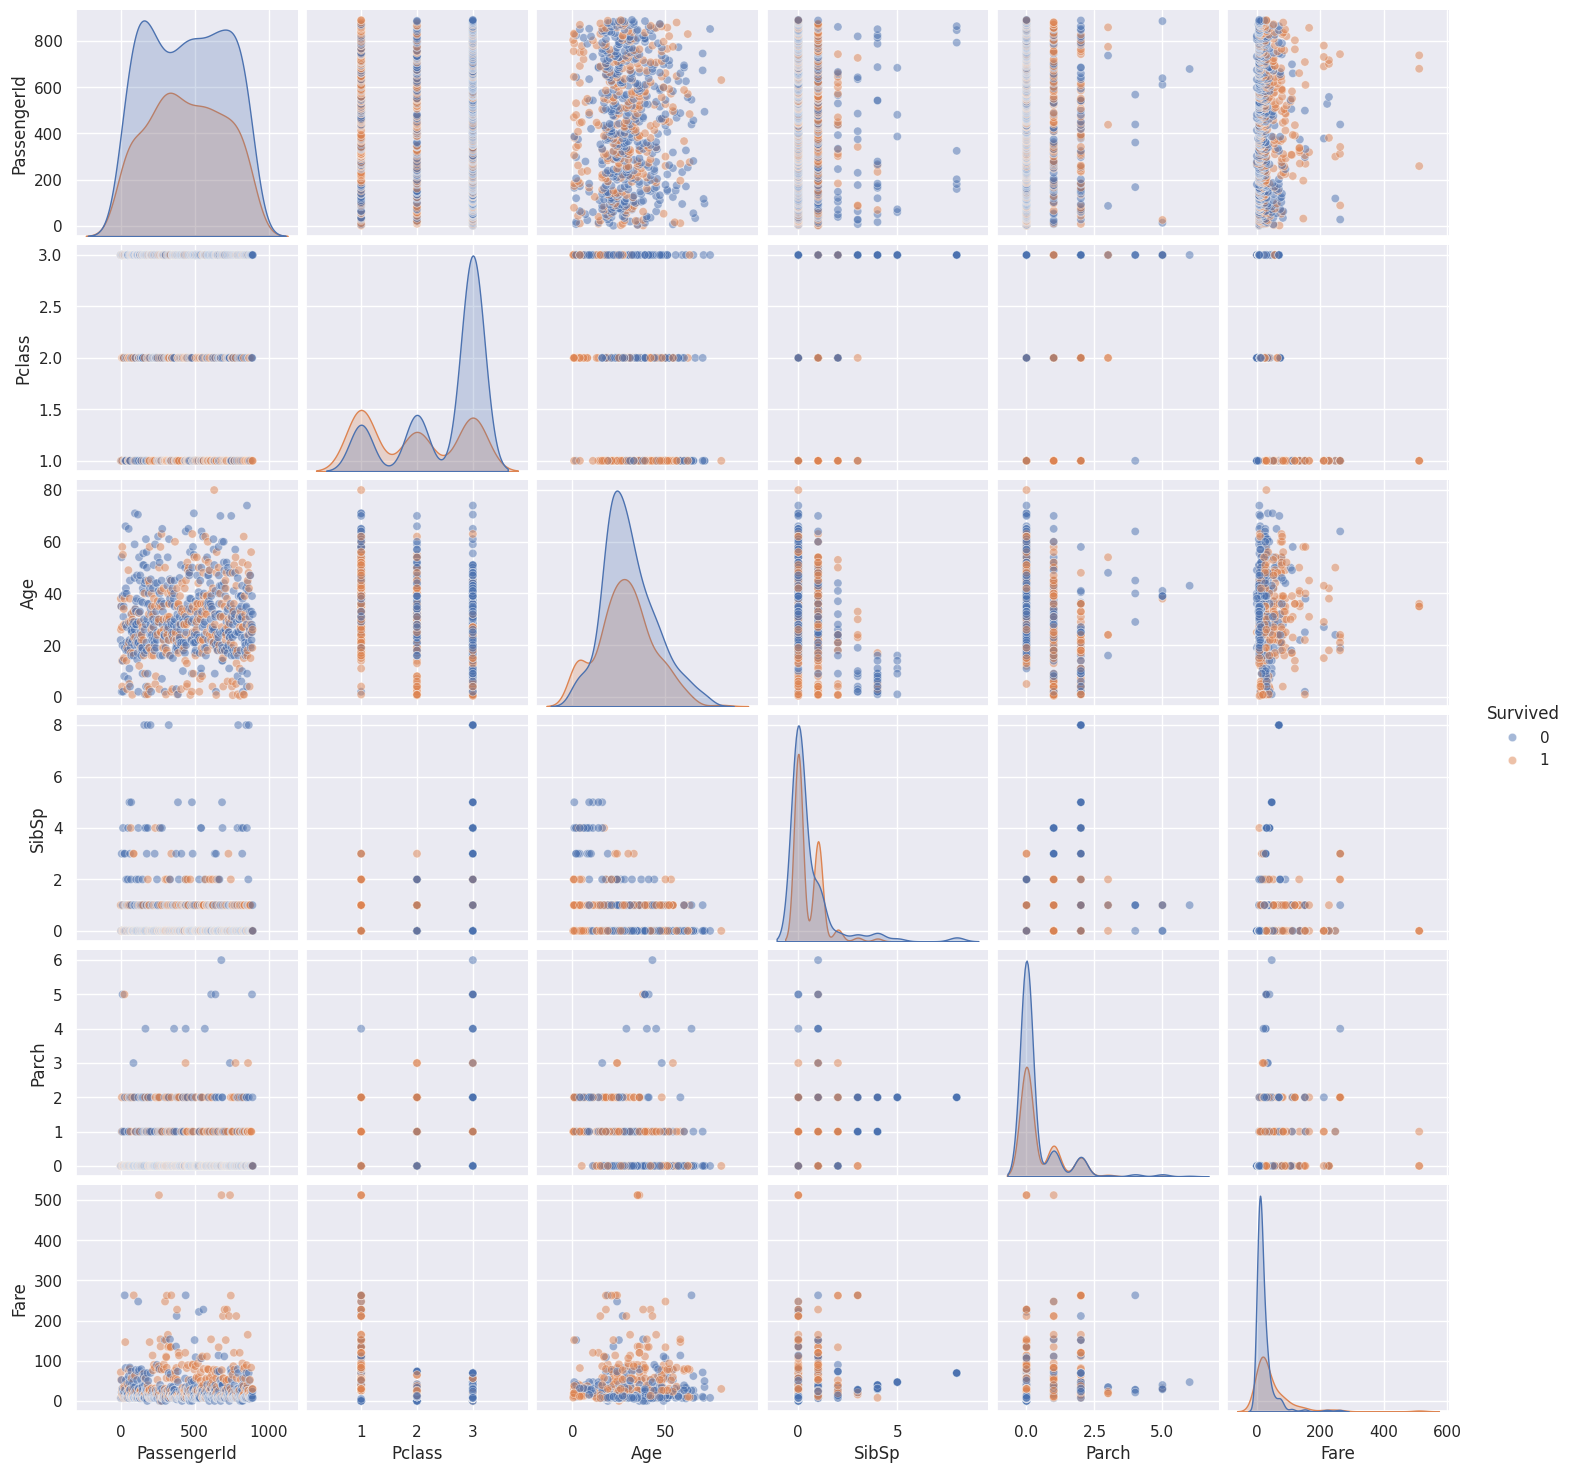

In [9]:
sns.pairplot(data=df, hue="Survived", kind="scatter", plot_kws={"alpha": 0.5})

`PassengerId`などは不必要なので、欲しいカラムに限定する。

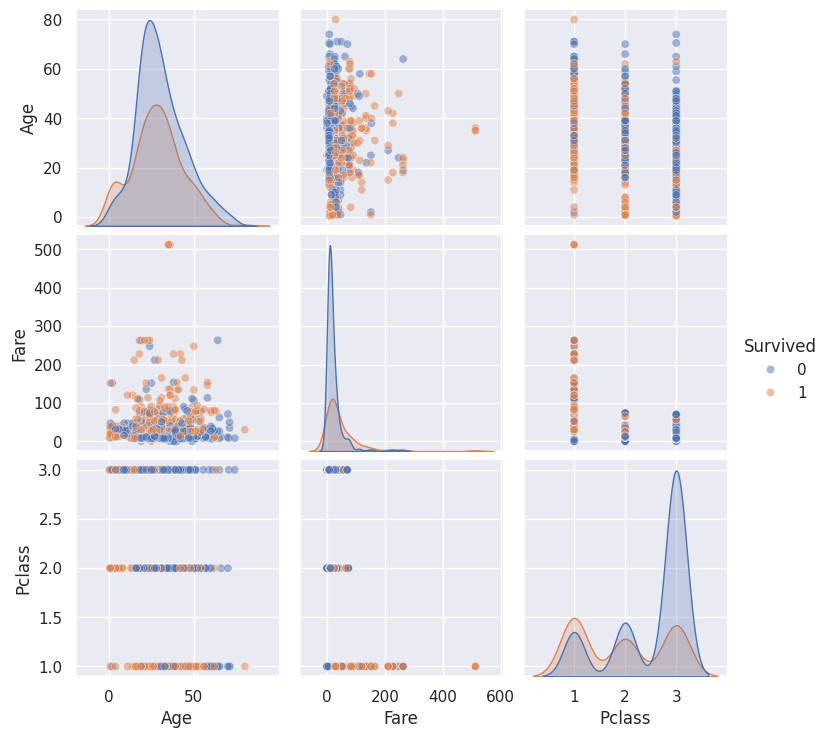

In [10]:
sns.pairplot(
    df[["Age", "Fare", "Pclass", "Survived"]], hue="Survived", plot_kws={"alpha": 0.5}
)

## 25 Seabornで簡単にお洒落な図を描画する【barplot, boxplot, swarmplot等】

[データサイエンスのためのPython入門25〜Seabornで簡単にお洒落な図を描画する【barplot, boxplot, swarmplot等】〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/seaborn_categoricalplot/)

### barplot(): 平均の信頼区間

<Axes: xlabel='Survived', ylabel='Age'>

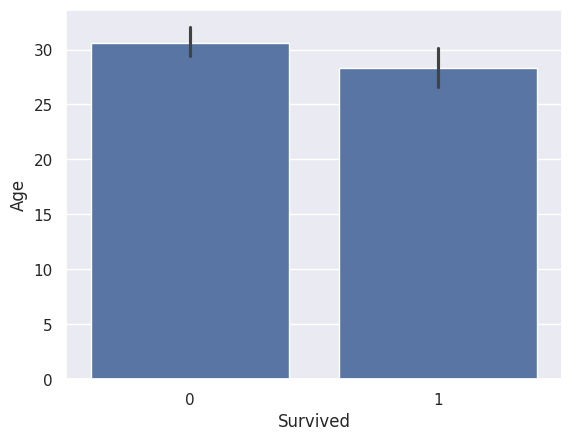

In [11]:
sns.barplot(data=df, x="Survived", y="Age")

信頼係数は`errorbar`で設定できる。99%信頼区間

**補足**: v0.12以降`ci`はdeprecated

<Axes: xlabel='Survived', ylabel='Age'>

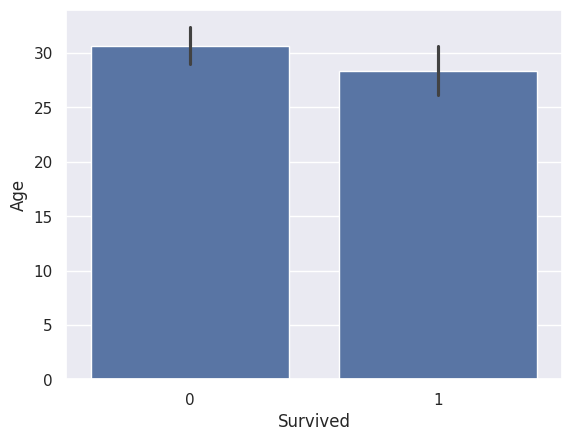

In [12]:
sns.barplot(data=df, x="Survived", y="Age", errorbar=("ci", 99))

中央値の比較

<Axes: xlabel='Survived', ylabel='Age'>

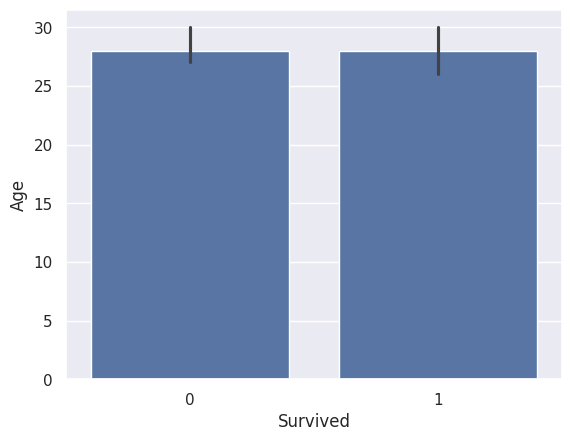

In [13]:
sns.barplot(data=df, x="Survived", y="Age", estimator="median")

平均値よりさらに有意差がない

### countplot(): 標本数の棒グラフ

<Axes: xlabel='Sex', ylabel='count'>

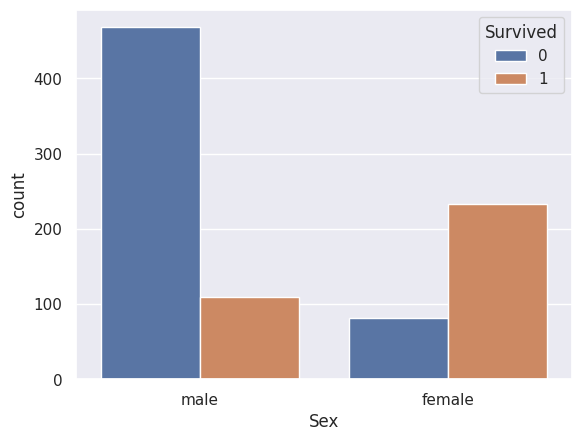

In [14]:
sns.countplot(data=df, x="Sex", hue="Survived")

### boxplot(): 箱ひげ図

<Axes: xlabel='Pclass', ylabel='Age'>

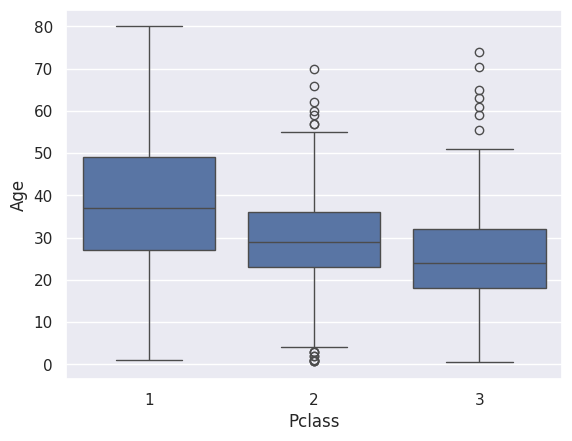

In [15]:
sns.boxplot(data=df, x="Pclass", y="Age")

チケットのクラスが上がるにつれて、年齢層が上がる

<Axes: xlabel='Pclass', ylabel='Age'>

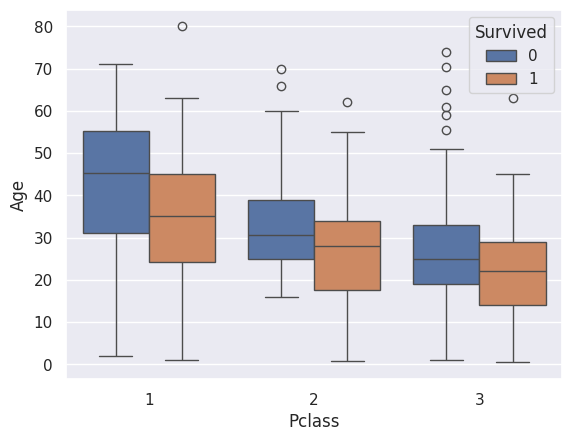

In [16]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")

同クラス内では生存者の方が年齢が低い傾向にある

### violinplot(): データの分布

<Axes: xlabel='Pclass', ylabel='Age'>

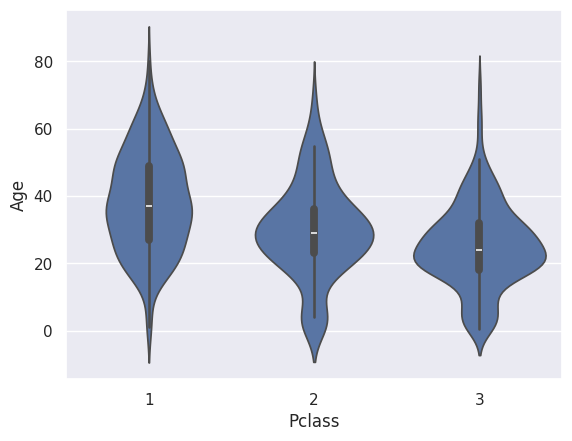

In [17]:
sns.violinplot(data=df, x="Pclass", y="Age")

### swarmplot(): データの分布（サイズを加味）

<Axes: xlabel='Pclass', ylabel='Age'>

/app/.venv/lib/python3.14/site-packages/seaborn/categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


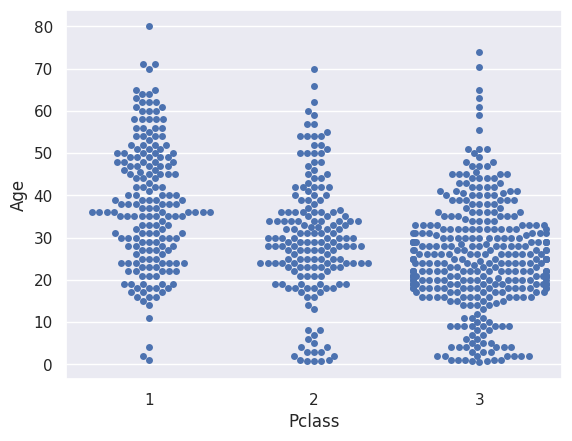

In [18]:
sns.swarmplot(data=df, x="Pclass", y="Age")

マーカーのサイズが大きすぎてグラフに描き切れないので、マーカーを小さくする。

<Axes: xlabel='Pclass', ylabel='Age'>

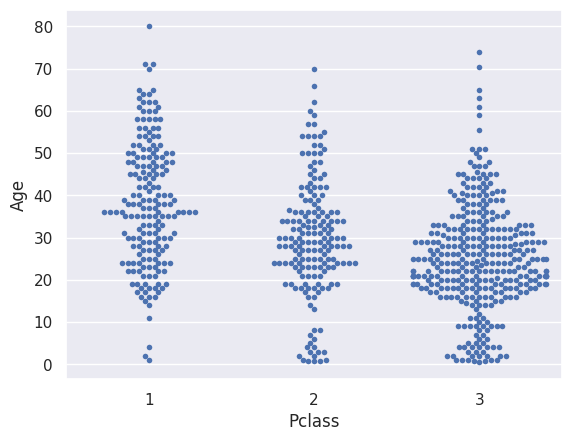

In [19]:
sns.swarmplot(data=df, x="Pclass", y="Age", size=4)

<Axes: xlabel='Pclass', ylabel='Age'>

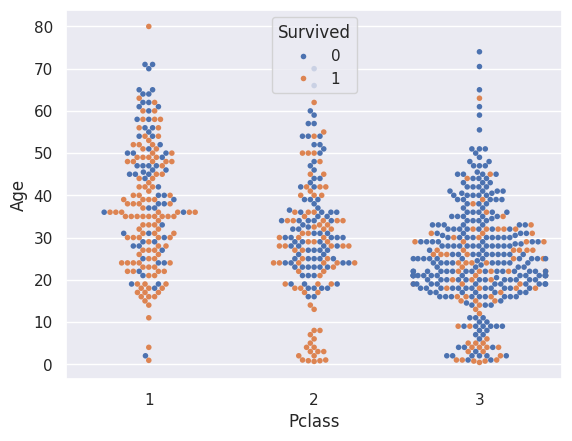

In [20]:
sns.swarmplot(data=df, x="Pclass", y="Age", size=4, hue="Survived")

3rdクラスの死亡率が圧倒的に高い

## 26 Seabornを使ってデータサイエンスに必須のHeatmapを描画する

[データサイエンスのためのPython入門26〜Seabornを使ってデータサイエンスに必須のHeatmapを描画する〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/seaborn_heatmap/)

### 相関行列

In [21]:
corr = df.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

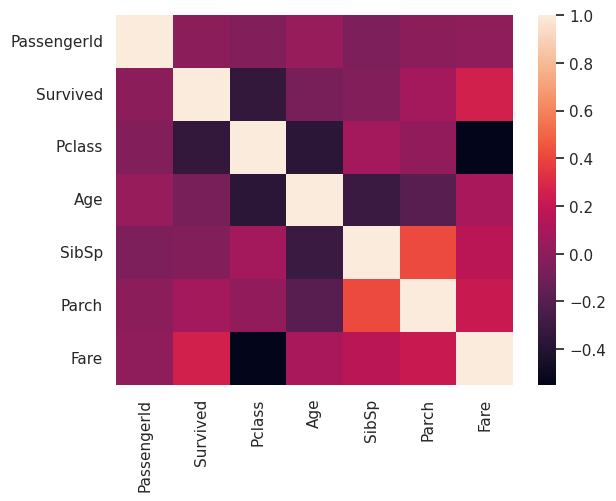

In [22]:
sns.heatmap(corr)

<Axes: >

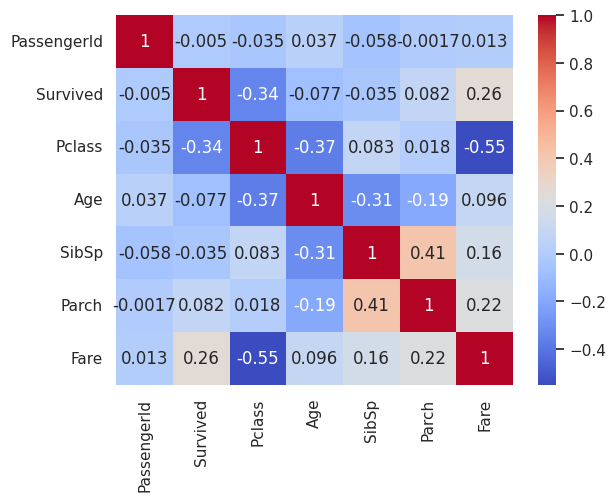

In [23]:
sns.heatmap(corr, cmap="coolwarm", annot=True)

### データの俯瞰

In [24]:
flights = sns.load_dataset("flights")
print(type(flights))
print(len(flights))
flights.head()

<class 'pandas.DataFrame'>
144


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

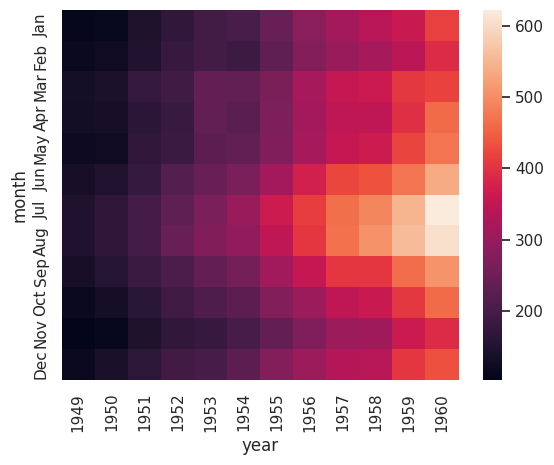

In [26]:
sns.heatmap(flights_pivot)

毎年夏に乗客が多く，年々乗客の数は増えている

## 27 Seabornの装飾(style)をいじる

[データサイエンスのためのPython入門27〜Seabornの装飾(style)をいじる〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/seaborn_set/)


In [27]:
df = pd.read_csv("train.csv")

### スタイルを変更

#### context

<Axes: xlabel='Age', ylabel='Count'>

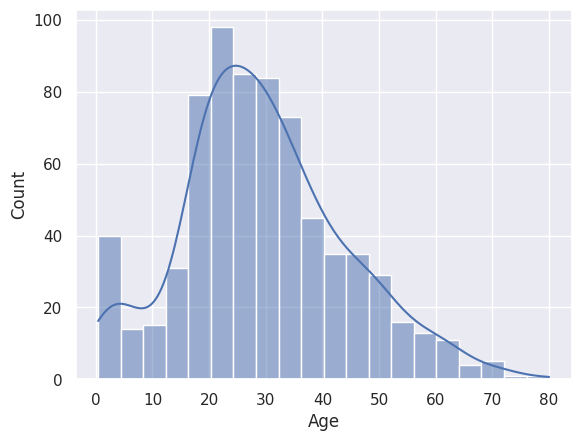

In [28]:
sns.set_theme()
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Age', ylabel='Count'>

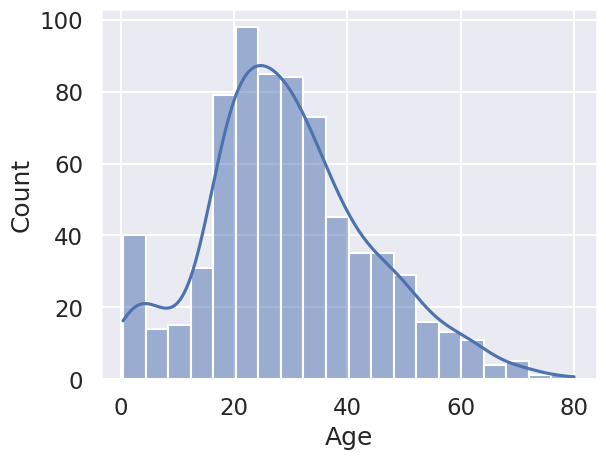

In [29]:
sns.set_theme(context="talk")
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Age', ylabel='Count'>

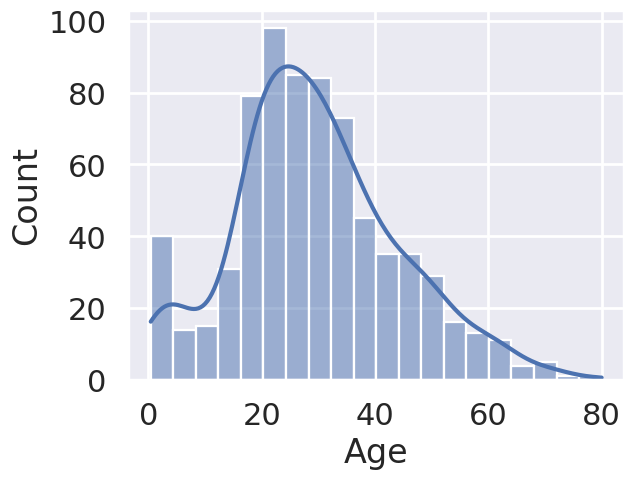

In [30]:
sns.set_theme(context="poster")
sns.histplot(data=df, x="Age", kde=True)

#### style

<Axes: xlabel='Age', ylabel='Count'>

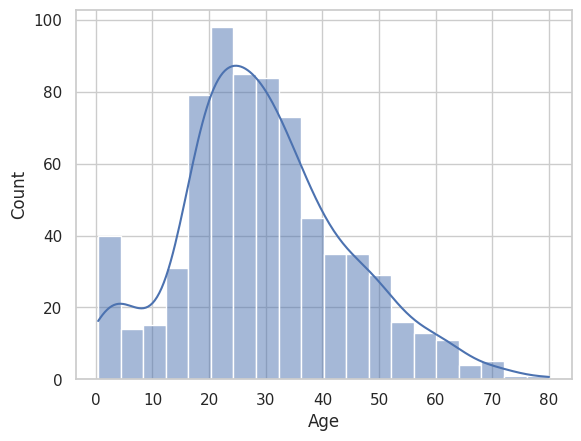

In [31]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Age', ylabel='Count'>

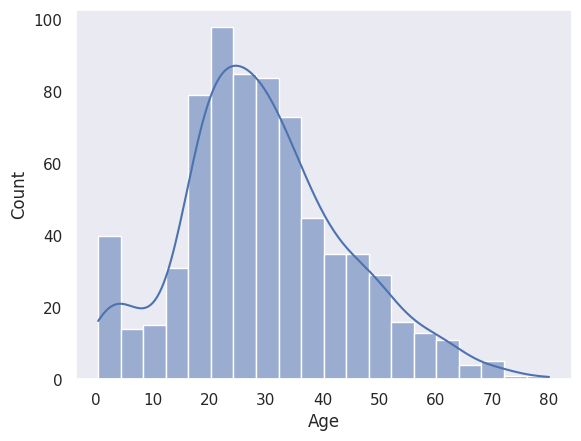

In [32]:
sns.set_theme(style="dark")
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Age', ylabel='Count'>

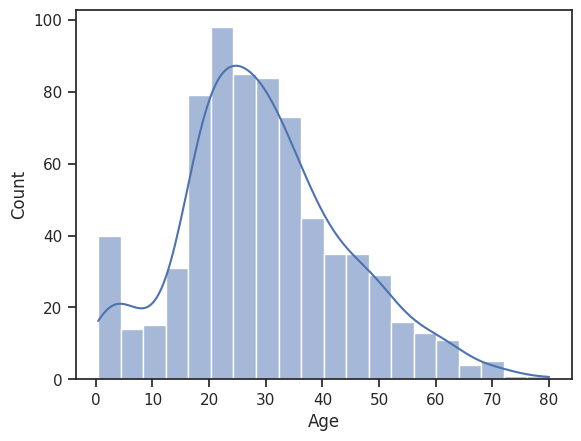

In [33]:
sns.set_theme(style="ticks")
sns.histplot(data=df, x="Age", kde=True)

上と右側の線は`despine()`関数で消せる。関数呼び出しの順番に注意！

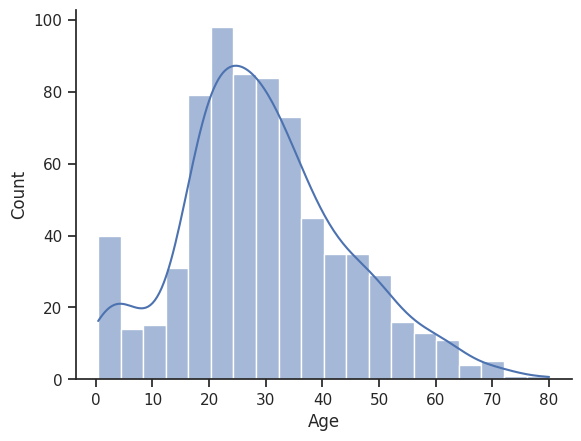

In [34]:
sns.set_theme(style="ticks")
sns.histplot(data=df, x="Age", kde=True)
sns.despine()

#### palette

<Axes: xlabel='Pclass', ylabel='Age'>

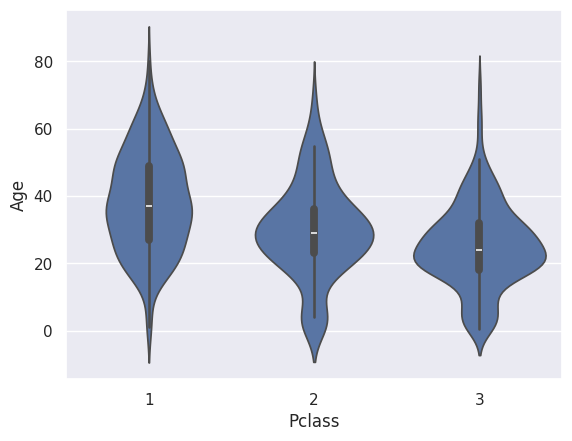

In [35]:
sns.set_theme(palette="deep")
sns.violinplot(data=df, x="Pclass", y="Age")

<Axes: xlabel='Pclass', ylabel='Age'>

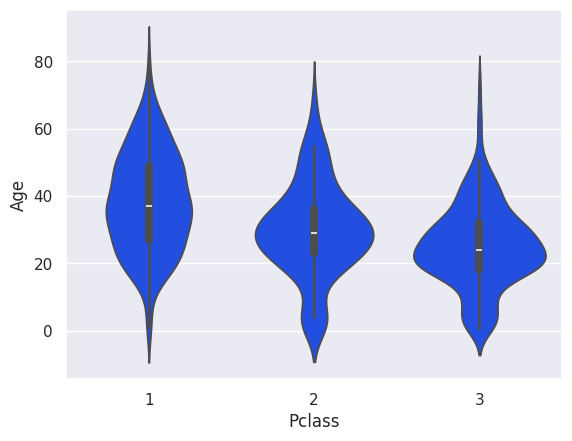

In [36]:
sns.set_theme(palette="bright")
sns.violinplot(data=df, x="Pclass", y="Age")

### matplotlibとの連携

**補足**: Seabornの関数はfigure-level（`displot()`など）とaxes-level（`histplot()`など）の2種類あり、matplotlibとの関わりが異なる。

#### axes-levelの関数

matplotlibと同じ、引数`ax`でmatplotlibと関連付けられる。

<Axes: xlabel='Age', ylabel='Count'>

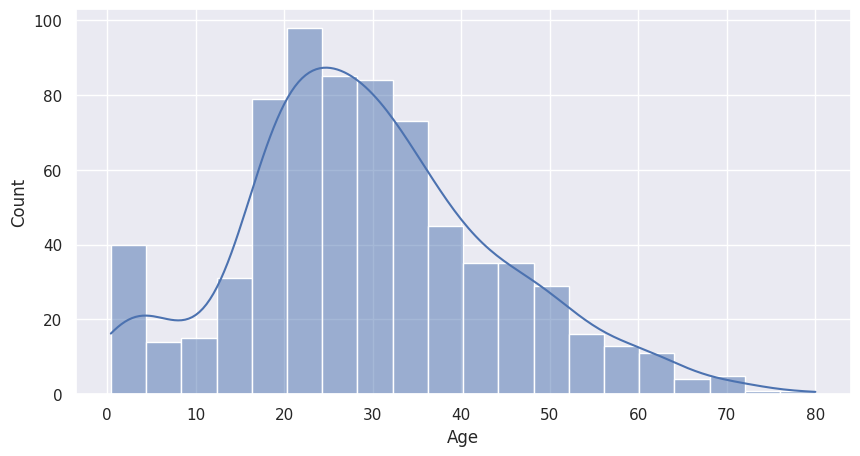

In [37]:
import matplotlib.pyplot as plt

sns.set_theme()
fig, axes = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="Age", kde=True, ax=axes)

#### figure-levelの関数

`Figure`クラスよりハイレベルな`FacetGrid`クラスを扱う。

- サイズは引数`height`（インチ）と **`aspect`（比率）** で指定できる
- matplotlibとパラーメータの指定方法が異なる。`width = height * aspect`
- あと、matplotlibの`figsize`のように`Figure`全体ではなく、**各サブプロットのサイズ** である点も異なる。

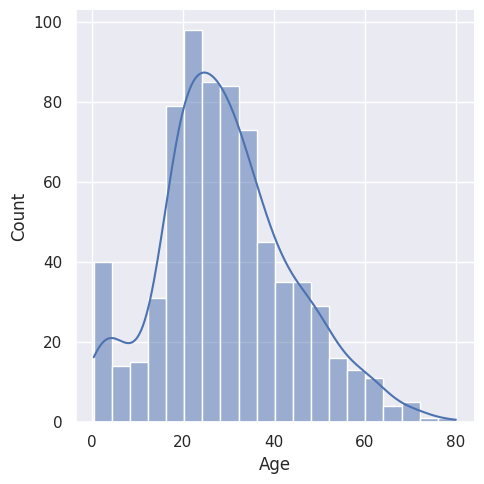

In [38]:
sns.set_theme()
sns.displot(data=df, x="Age", kde=True)

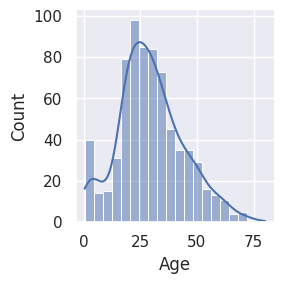

In [39]:
sns.set_theme()
sns.displot(data=df, x="Age", kde=True, height=3)

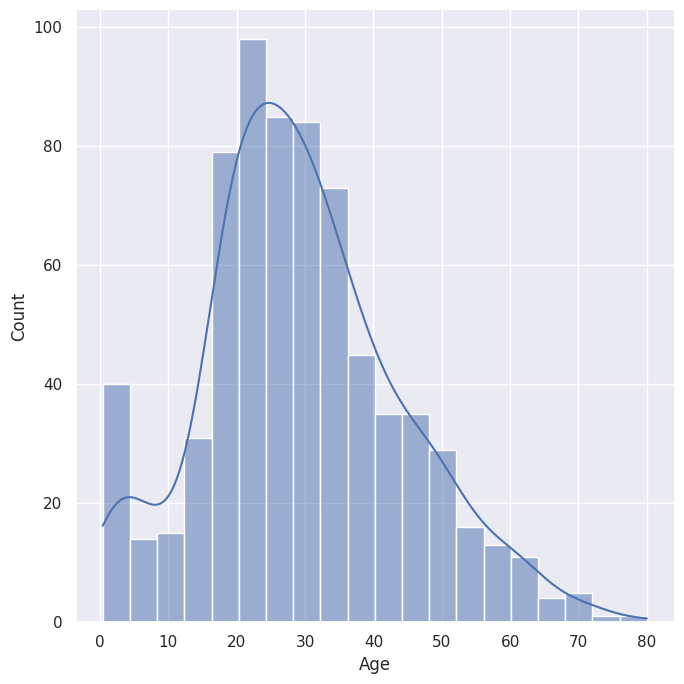

In [40]:
sns.set_theme()
sns.displot(data=df, x="Age", kde=True, height=7)

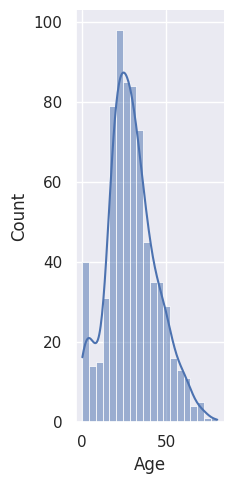

In [41]:
sns.set_theme()
sns.displot(data=df, x="Age", kde=True, aspect=0.5)

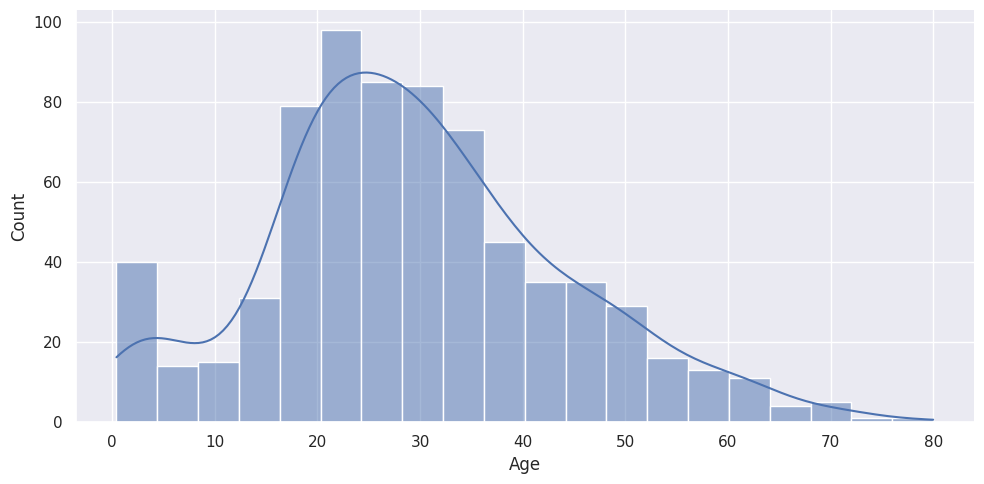

In [42]:
sns.set_theme()
sns.displot(data=df, x="Age", kde=True, aspect=2)

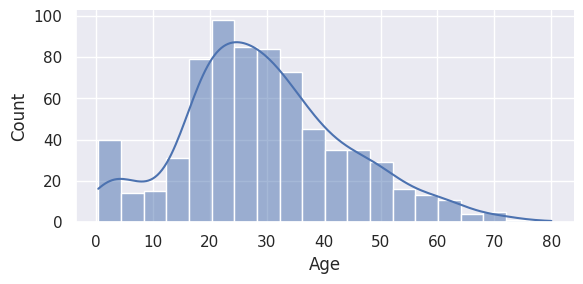

In [43]:
sns.set_theme()
sns.displot(data=df, x="Age", kde=True, height=3, aspect=2)

**補足**: ファイルの保存は`FacetGrid`クラスの`savefig()`メソッドが使える。

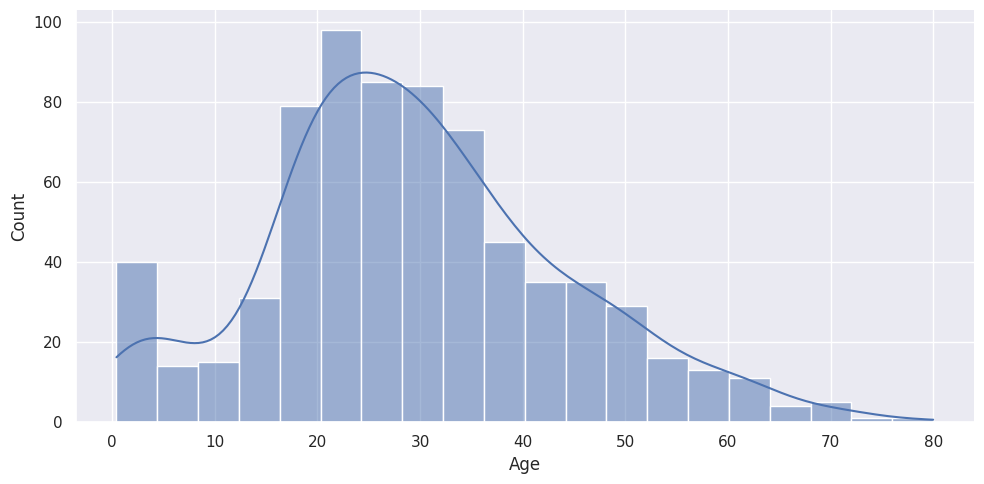

In [44]:
sns.set_theme()
g = sns.displot(data=df, x="Age", kde=True, aspect=2)
g.savefig("python-27-seaborn_sample.png")